# Basic usage

In [13]:
%matplotlib notebook

In [12]:
# imports
from importlib import reload

from kcwitools import io as kcwi_io
from kcwitools import utils as kcwi_u
from kcwitools import image as kcwi_img
from kcwitools import plot as kcwi_p

## Open a datacube

### Flux

In [2]:
data_file = 'test.fits'

In [3]:
hdr, flux = kcwi_io.open_kcwi_cube(data_file)

In [4]:
flux.shape

(2597, 70, 55)

### Wavelengths

In [6]:
wave = kcwi_u.build_wave(hdr)

In [7]:
wave

array([3228., 3229., 3230., ..., 5822., 5823., 5824.])

## Show a white-light image

### Build

In [14]:
reload(kcwi_img)
whiteim = kcwi_img.build_whitelight(hdr,flux)

### Show

<IPython.core.display.Javascript object>


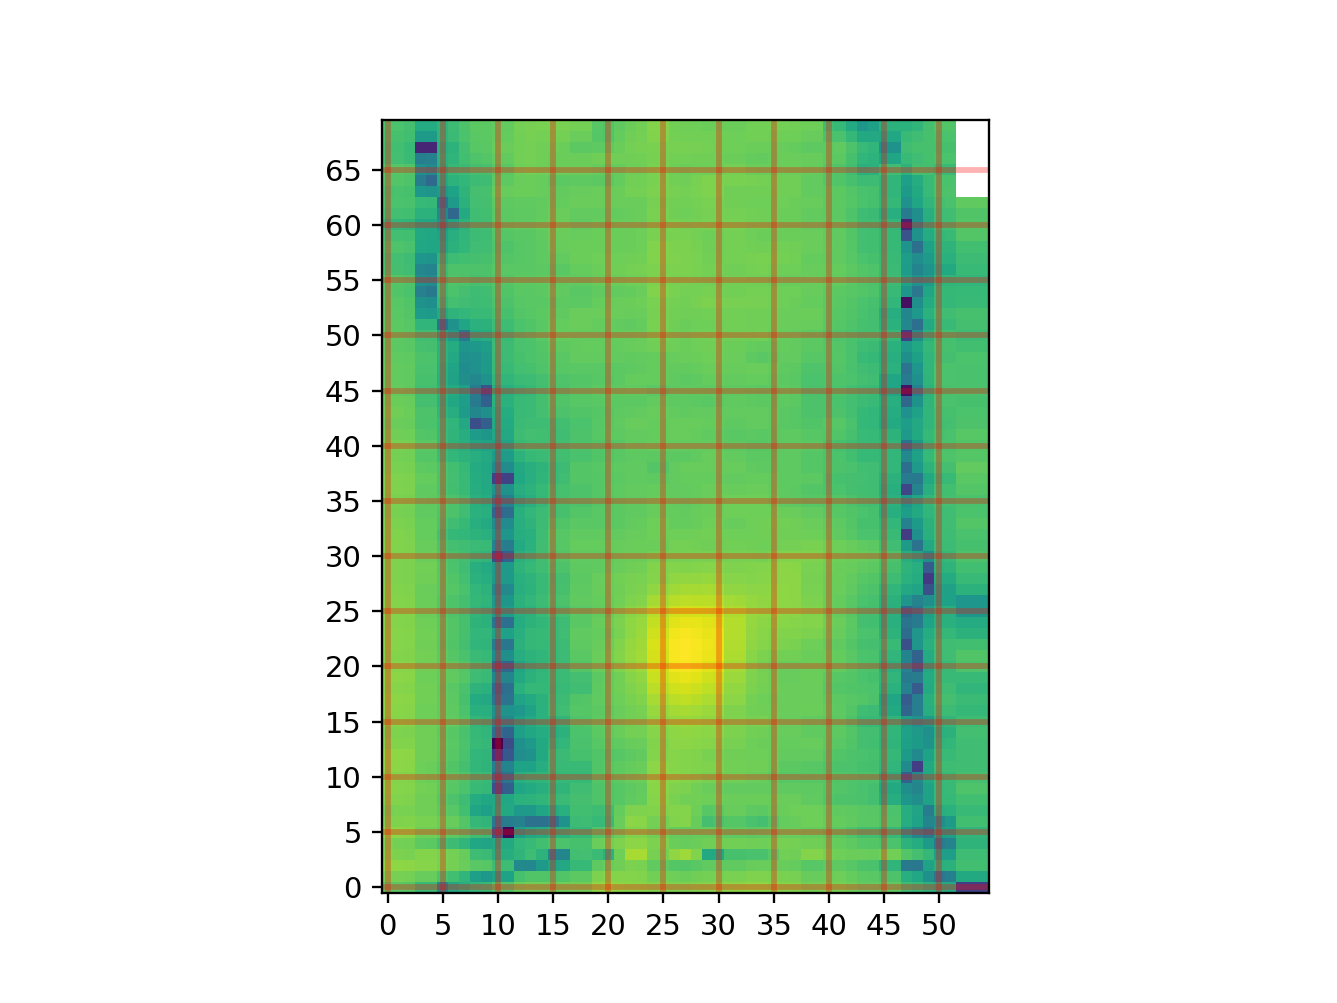

In [16]:
reload(kcwi_p)
kcwi_p.show_whitelight(whiteim)